# **American Sign Language (ASL) Real-Time Detection 🤟**
## **Part 1 - Training**

## **0.** Settings

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install Yolov5
!git clone https://github.com/ultralytics/yolov5
%cd ./yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17088, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 17088 (delta 22), reused 7 (delta 7), pack-reused 17057 (from 5)
Receiving objects: 100% (17088/17088), 15.70 MiB | 27.33 MiB/s, done.
Resolving deltas: 100% (11722/11722), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 905.3/905.3 kB 17.0 MB/s eta 0:00:00


In [ ]:
from IPython.display import Image, display
import torch
import glob

# Fix a seed for PyTorch
torch.manual_seed(4200);

## ===========================
##   GPU
## ===========================

gpu = True

if gpu == True:
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

## **1.** Dataset

In [2]:
%cd ../
!curl -L 'https://public.roboflow.com/ds/17NegIfQmB?key=hcuRWqQdtE' > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

/
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   3546      0 --:--:-- --:--:-- --:--:--  3554
100 22.3M  100 22.3M    0     0  15.0M      0  0:00:01  0:00:01 --:--:-- 33.1M
Archive:  roboflow.zip
 extracting: test/images/G7_jpg.rf.04faf434dd590a7bd02818b2b57a704f.jpg  
 extracting: test/images/S6_jpg.rf.0b6e42445a56998369cdd3759c2cf3d4.jpg  
 extracting: test/images/T24_jpg.rf.068e7b2424eac996c86bb6d9c38e083d.jpg  
 extracting: test/images/K12_jpg.rf.1bd849de853e33f6262b6643555e098f.jpg  
 extracting: test/images/J9_jpg.rf.213a9e356777a13d336e4988c33a93e1.jpg  
 extracting: test/images/X9_jpg.rf.28187742b082579d85eda81cf98bf5bb.jpg  
 extracting: test/images/B15_jpg.rf.0f0628552139144fc67c453e1f1b7b15.jpg  
 extracting: test/images/W24_jpg.rf.1bc37c6fc4770b284edc6f9027eb6cf2.jpg  
 extracting: test/images/S16_jpg.rf.138a4aa81180adcc24323c1634e

In [3]:
!more data.yaml

train: ../train/images
val: ../valid/images

nc: 26
names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S
', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


## **2.** Training

In [ ]:
!python /content/yolov5/train.py --img 448 --batch 64 --epochs 500 --data /content/data.yaml --weights yolov5s.pt --workers 8

Streaming output truncated to the last 5000 lines.
    197/499      8.27G    0.02024   0.008459    0.01394        151        448:  17% 4/24 [00:01<00:08,  2.26it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    197/499      8.27G    0.02006   0.008314    0.01404        140        448:  21% 5/24 [00:02<00:09,  2.07it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    197/499      8.27G    0.02014   0.008352    0.01367        154        448:  25% 6/24 [00:02<00:09,  1.85it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
    197/499      8.27G    0.02045   0.00

## **3.** Validation

In [ ]:
!python /content/yolov5/val.py --weights /content/yolov5/runs/train/exp/weights/best.pt --data /content/data.yaml --img 448

val: data=/content/data.yaml, weights=['/content/yolov5/runs/train/exp/weights/best.pt'], batch_size=32, imgsz=448, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=yolov5/runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-307-g92e47b8 Python-3.7.13 torch-1.12.0+cu113 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 213 layers, 7080247 parameters, 0 gradients, 16.0 GFLOPs
val: Scanning '/content/yolov5/../valid/labels.cache' images and labels... 144 found, 0 missing, 0 empty, 0 corrupt: 100% 144/144 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 5/5 [00:03<00:00,  1.53it/s]
                 all        144        144        0.9      0.867      0.954      0.775
                   A        144          5          1      0.839      0.995      0.864
         

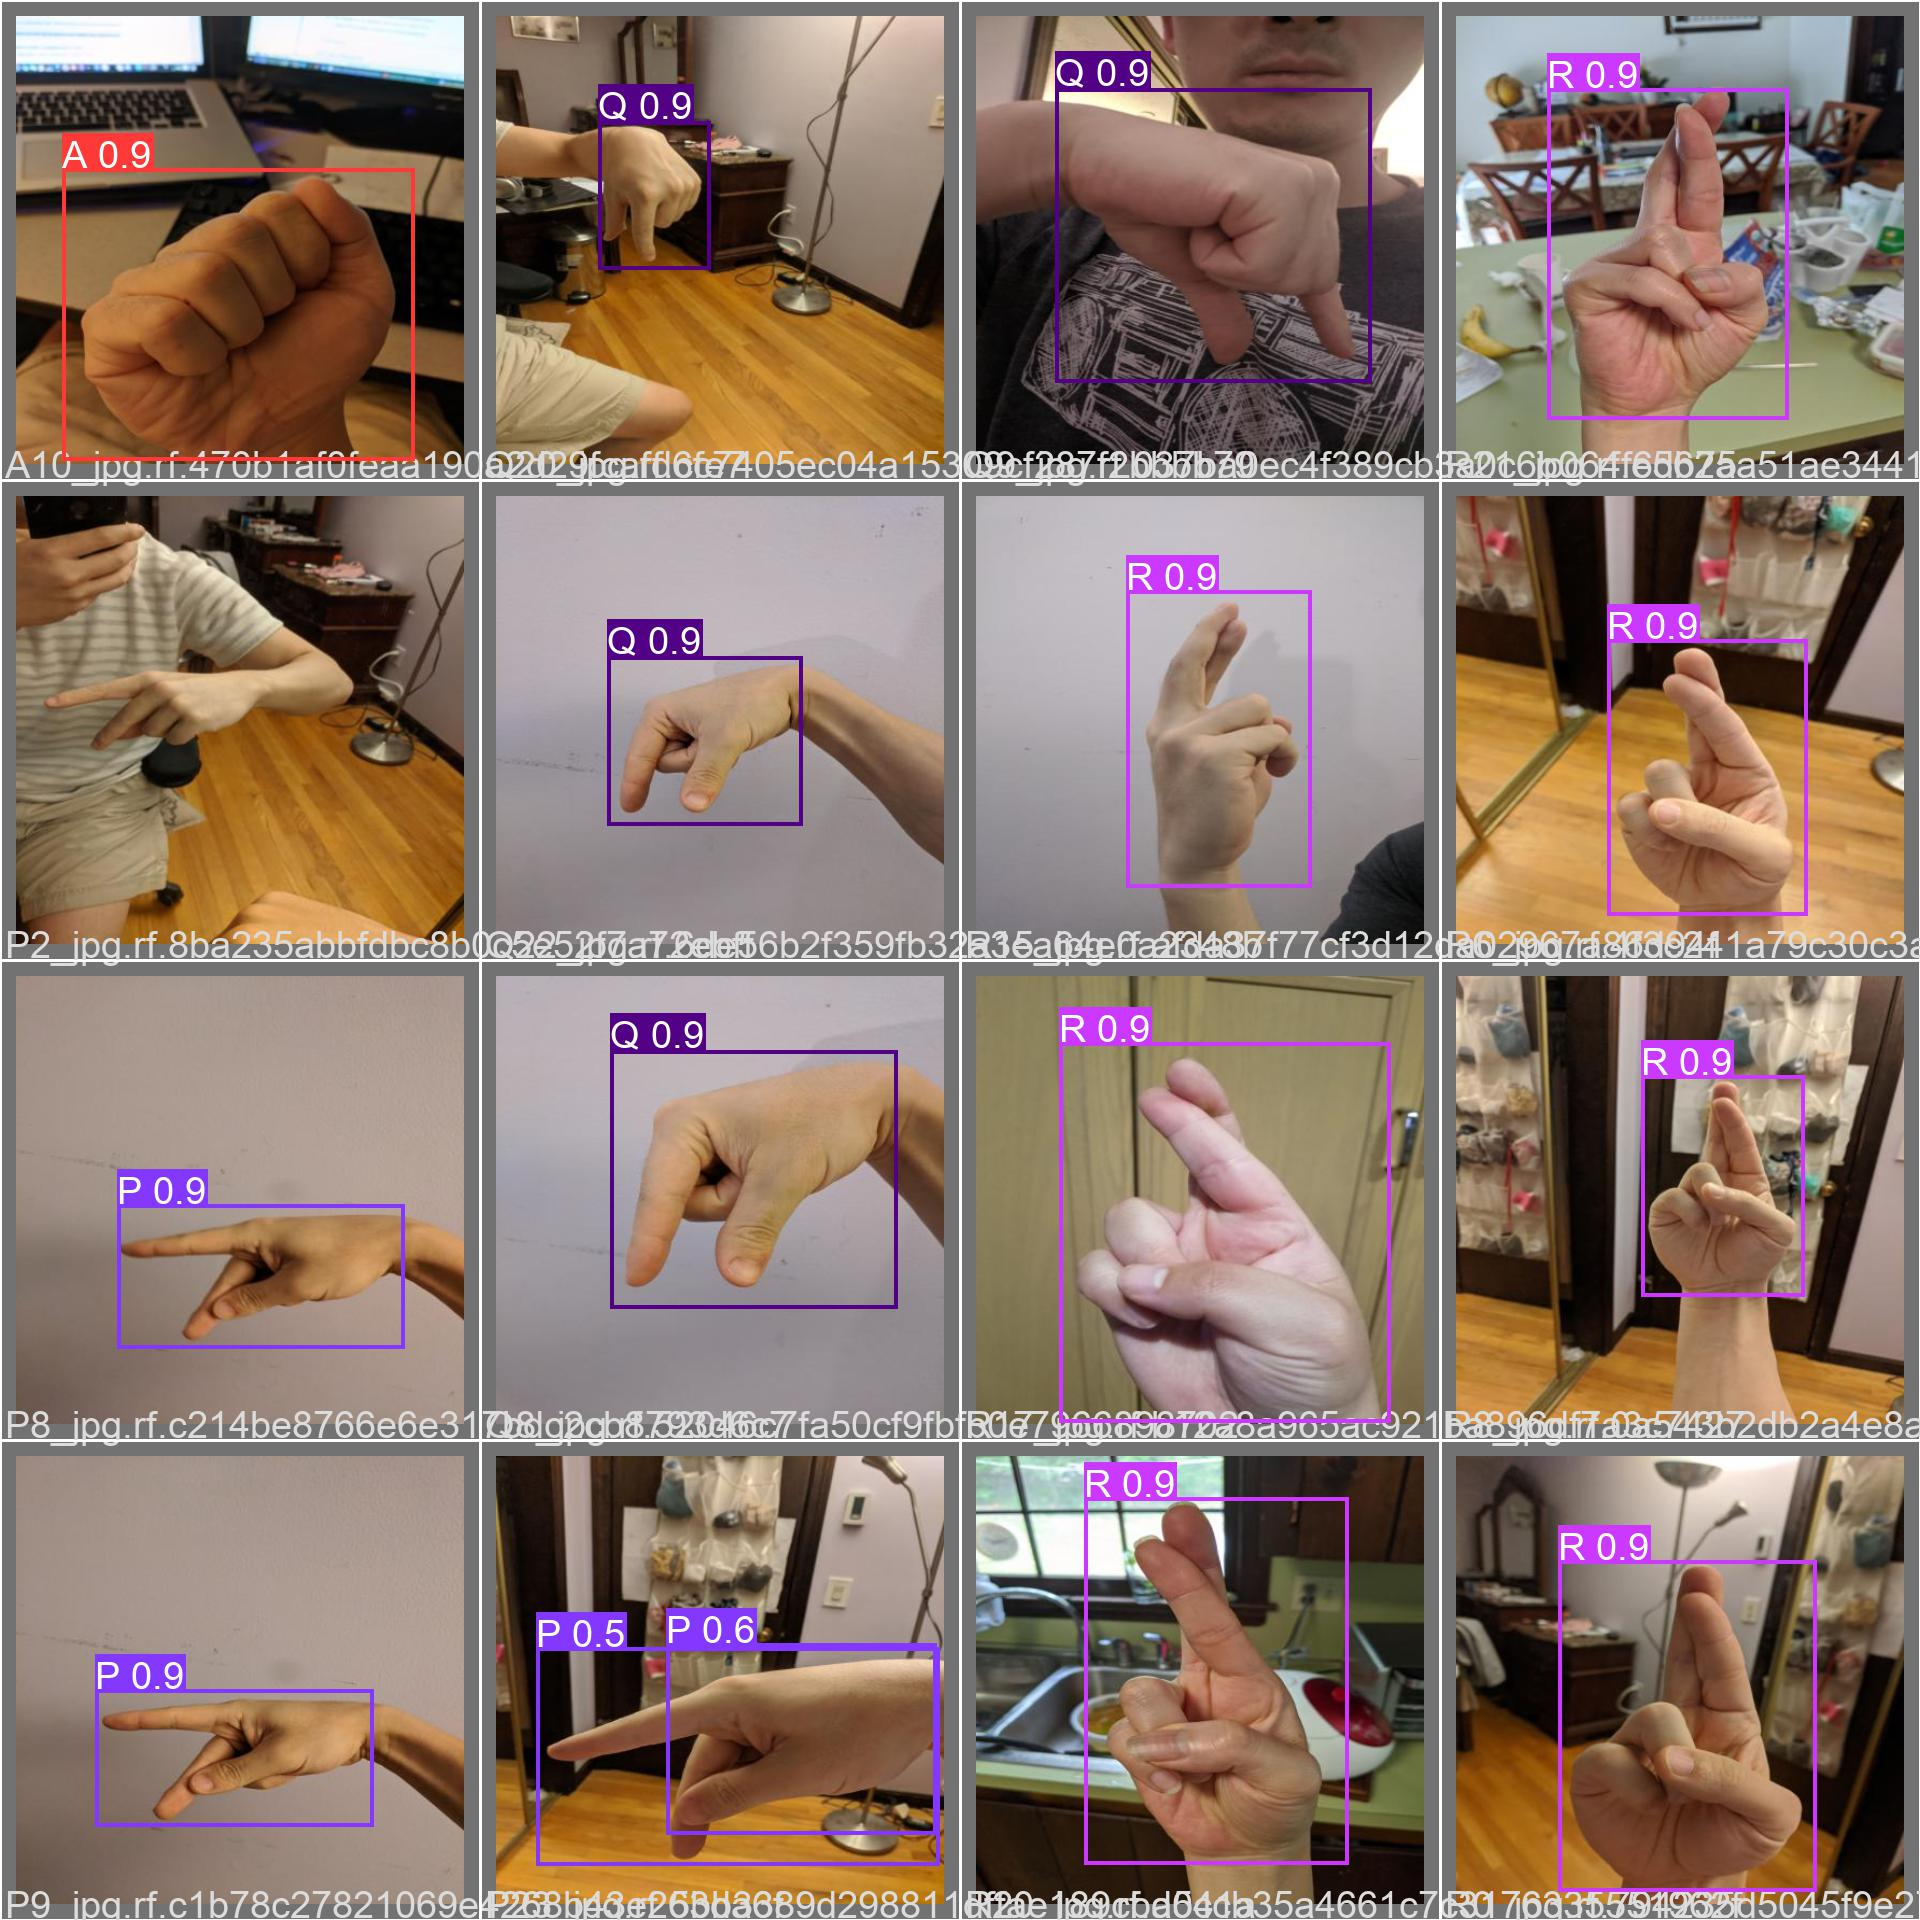

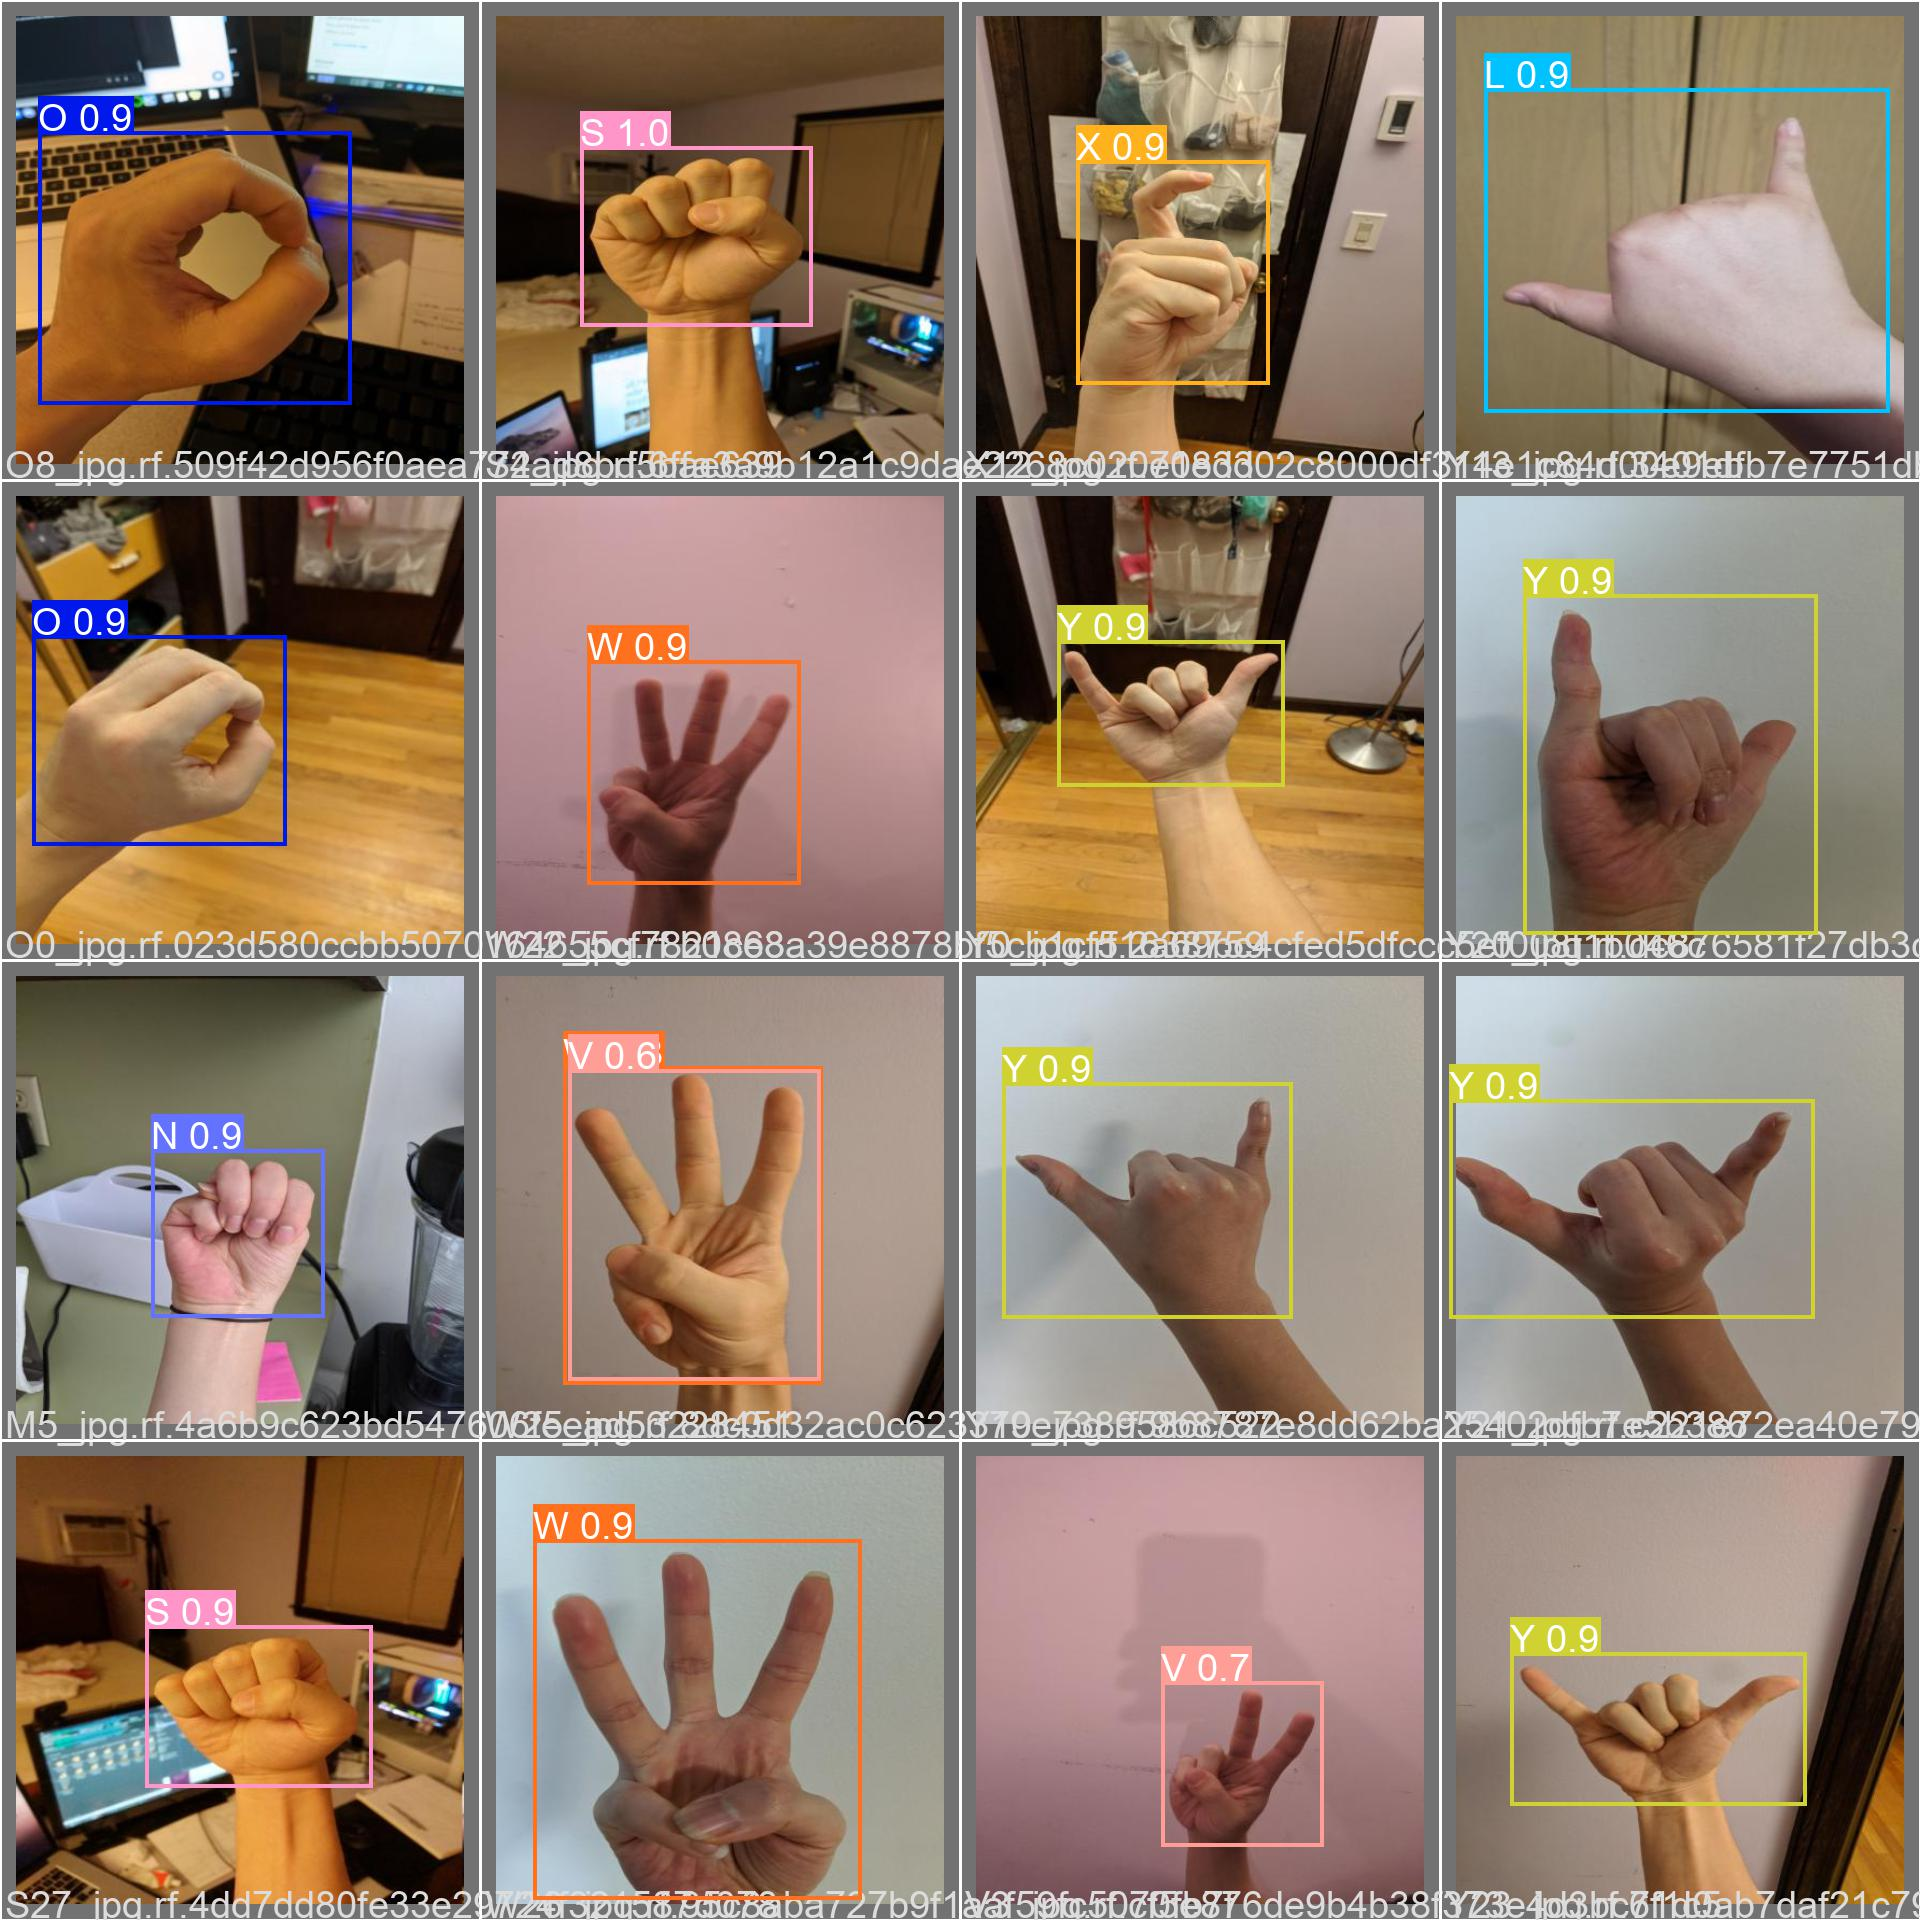

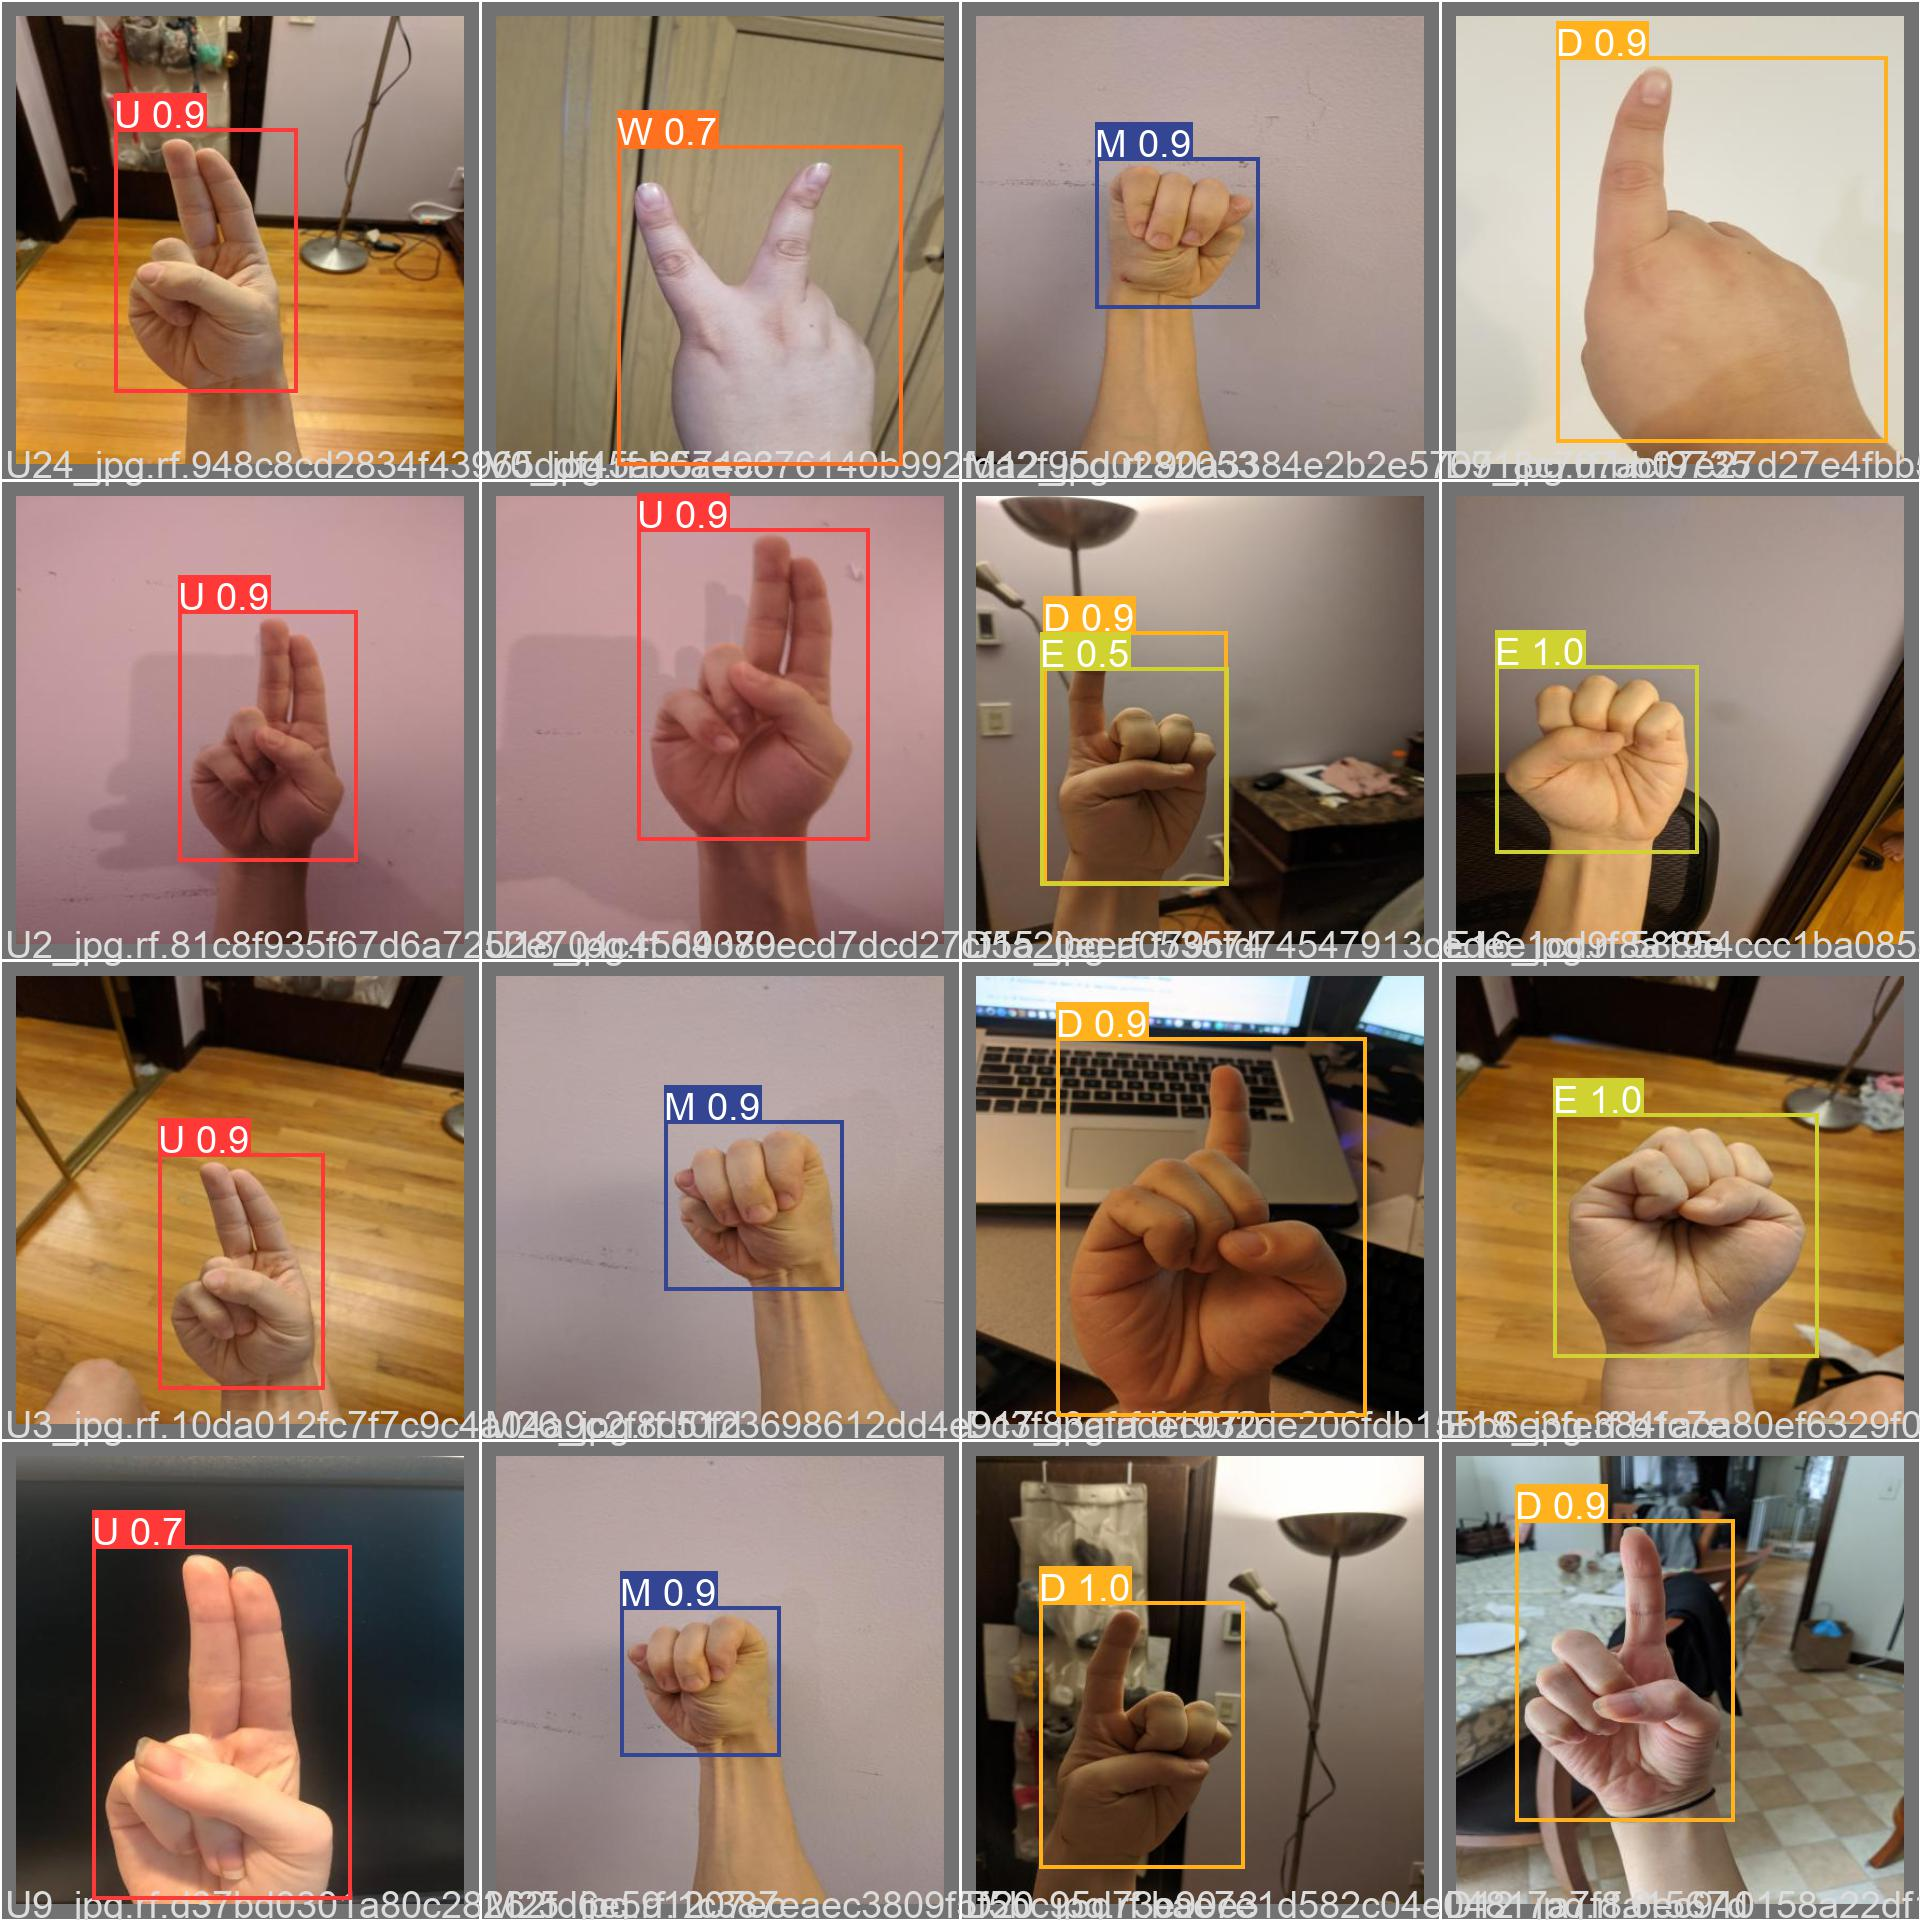

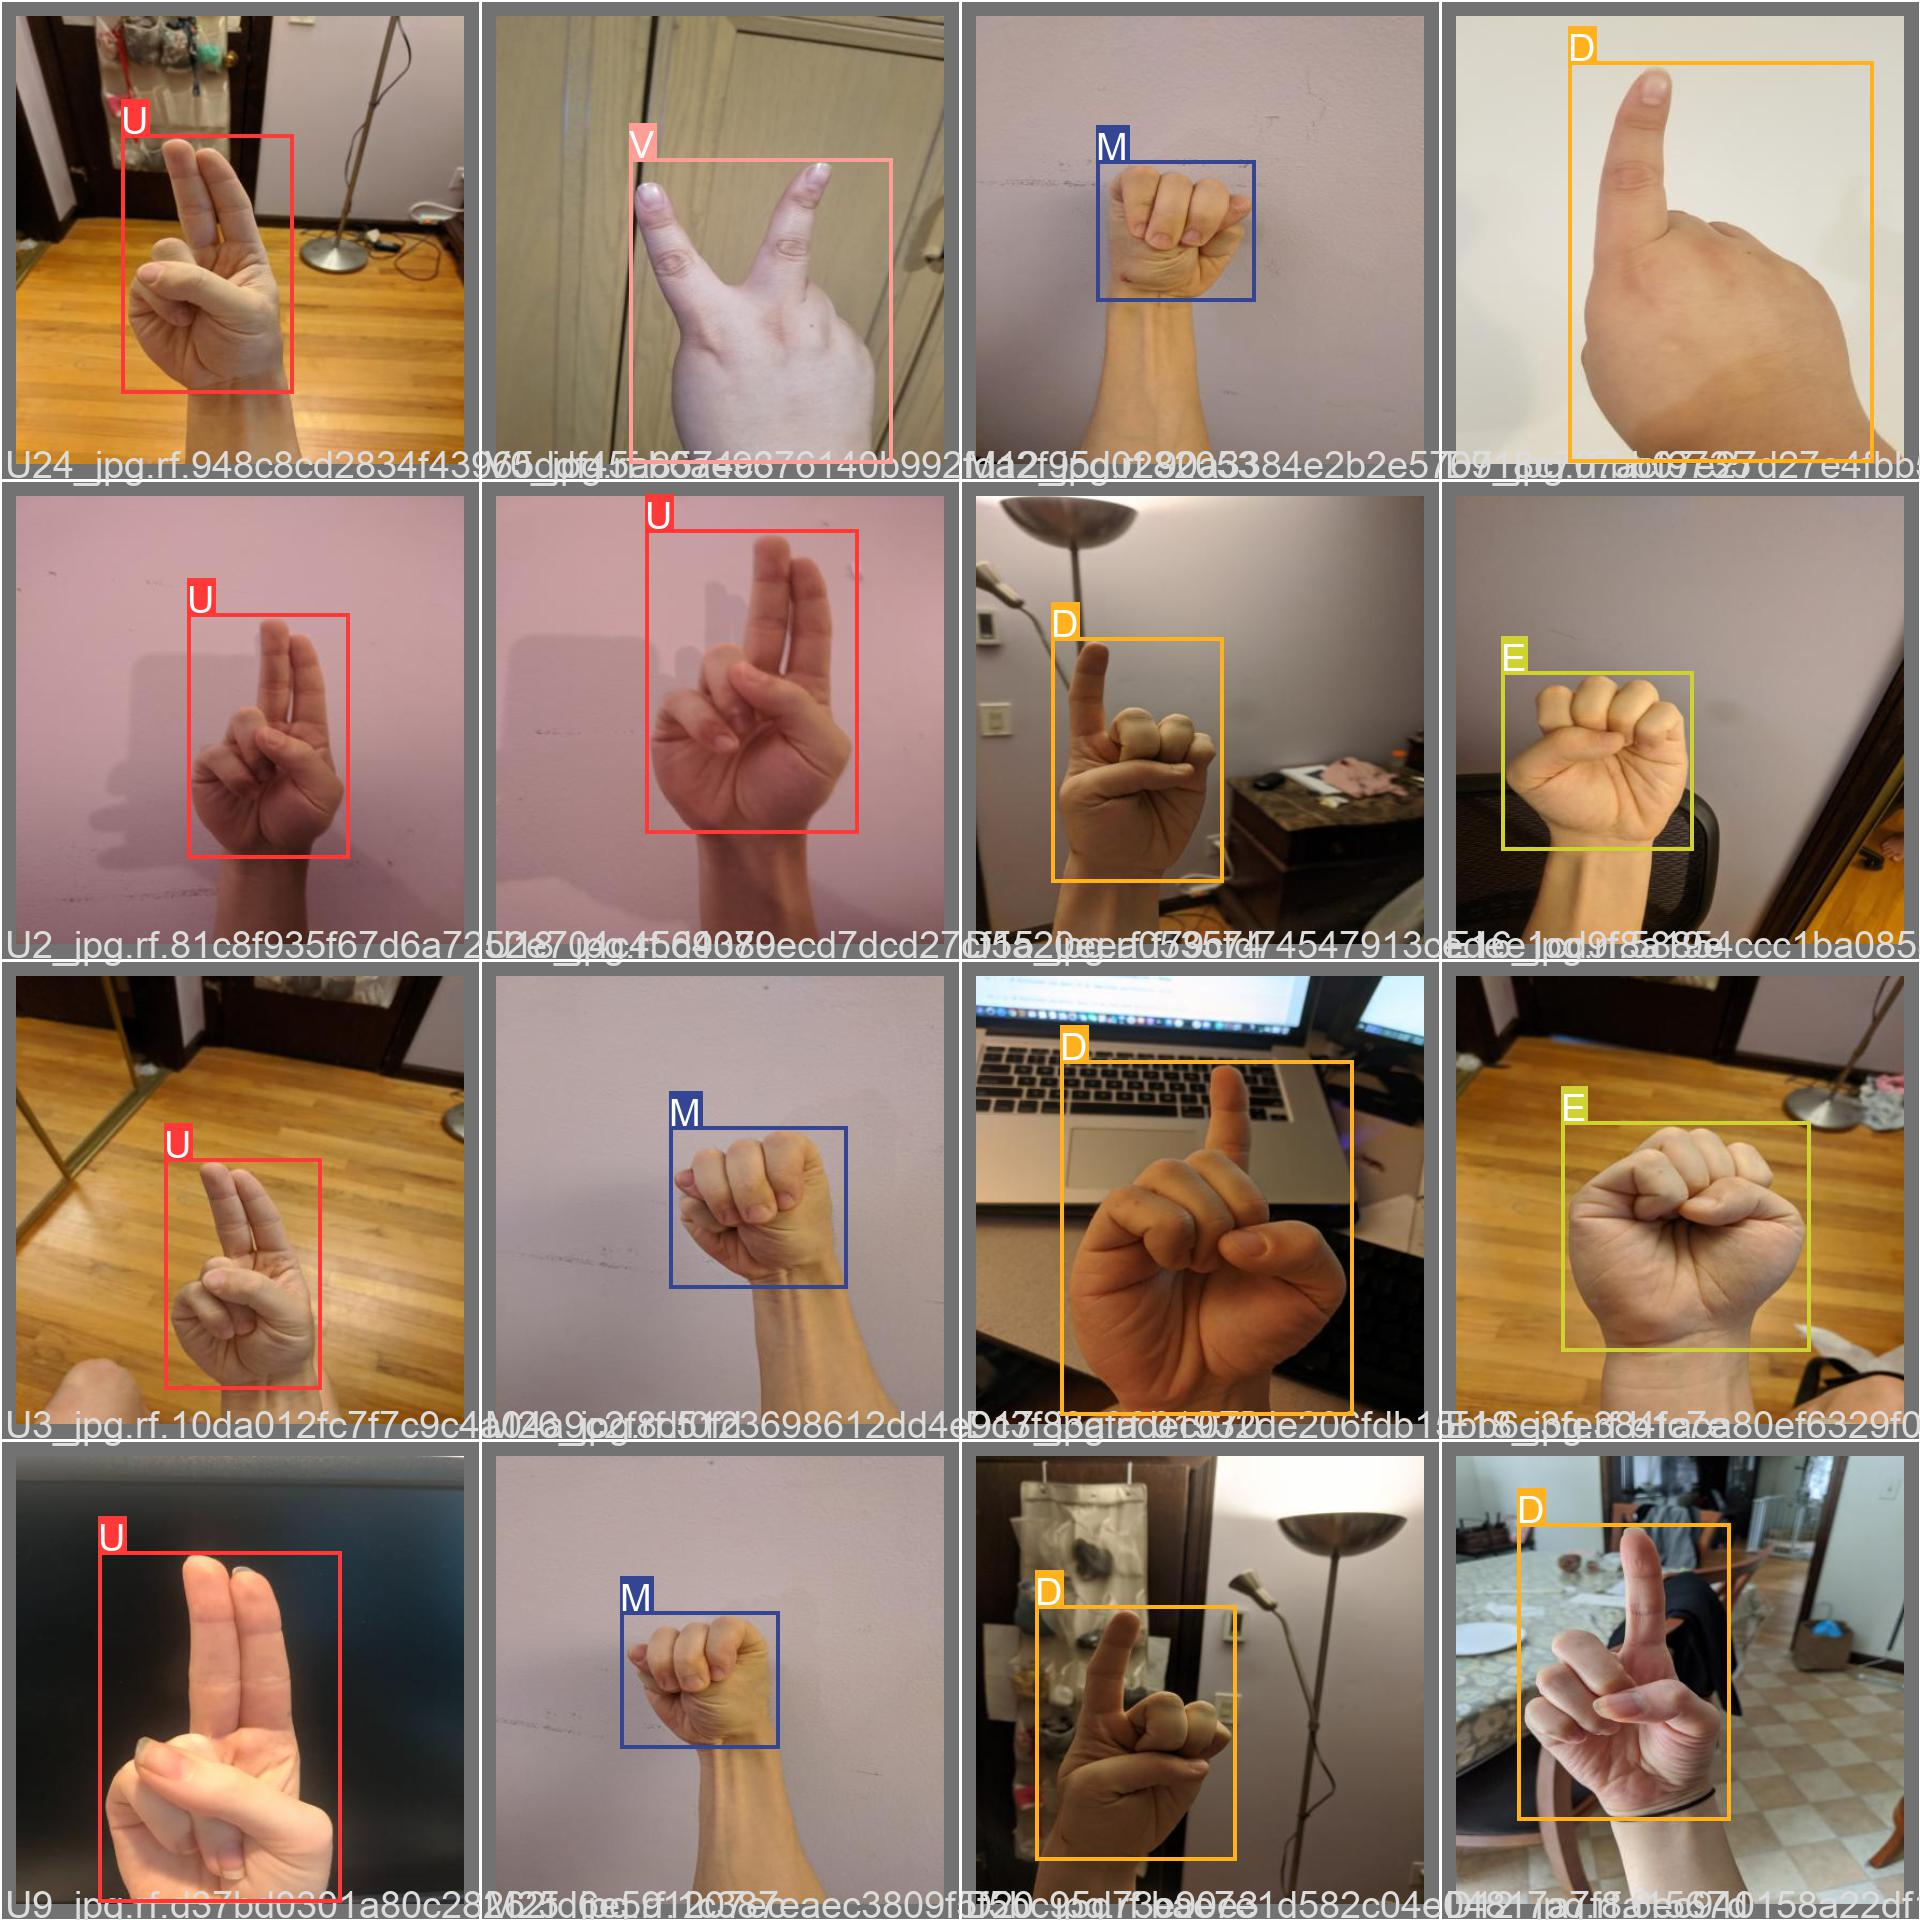

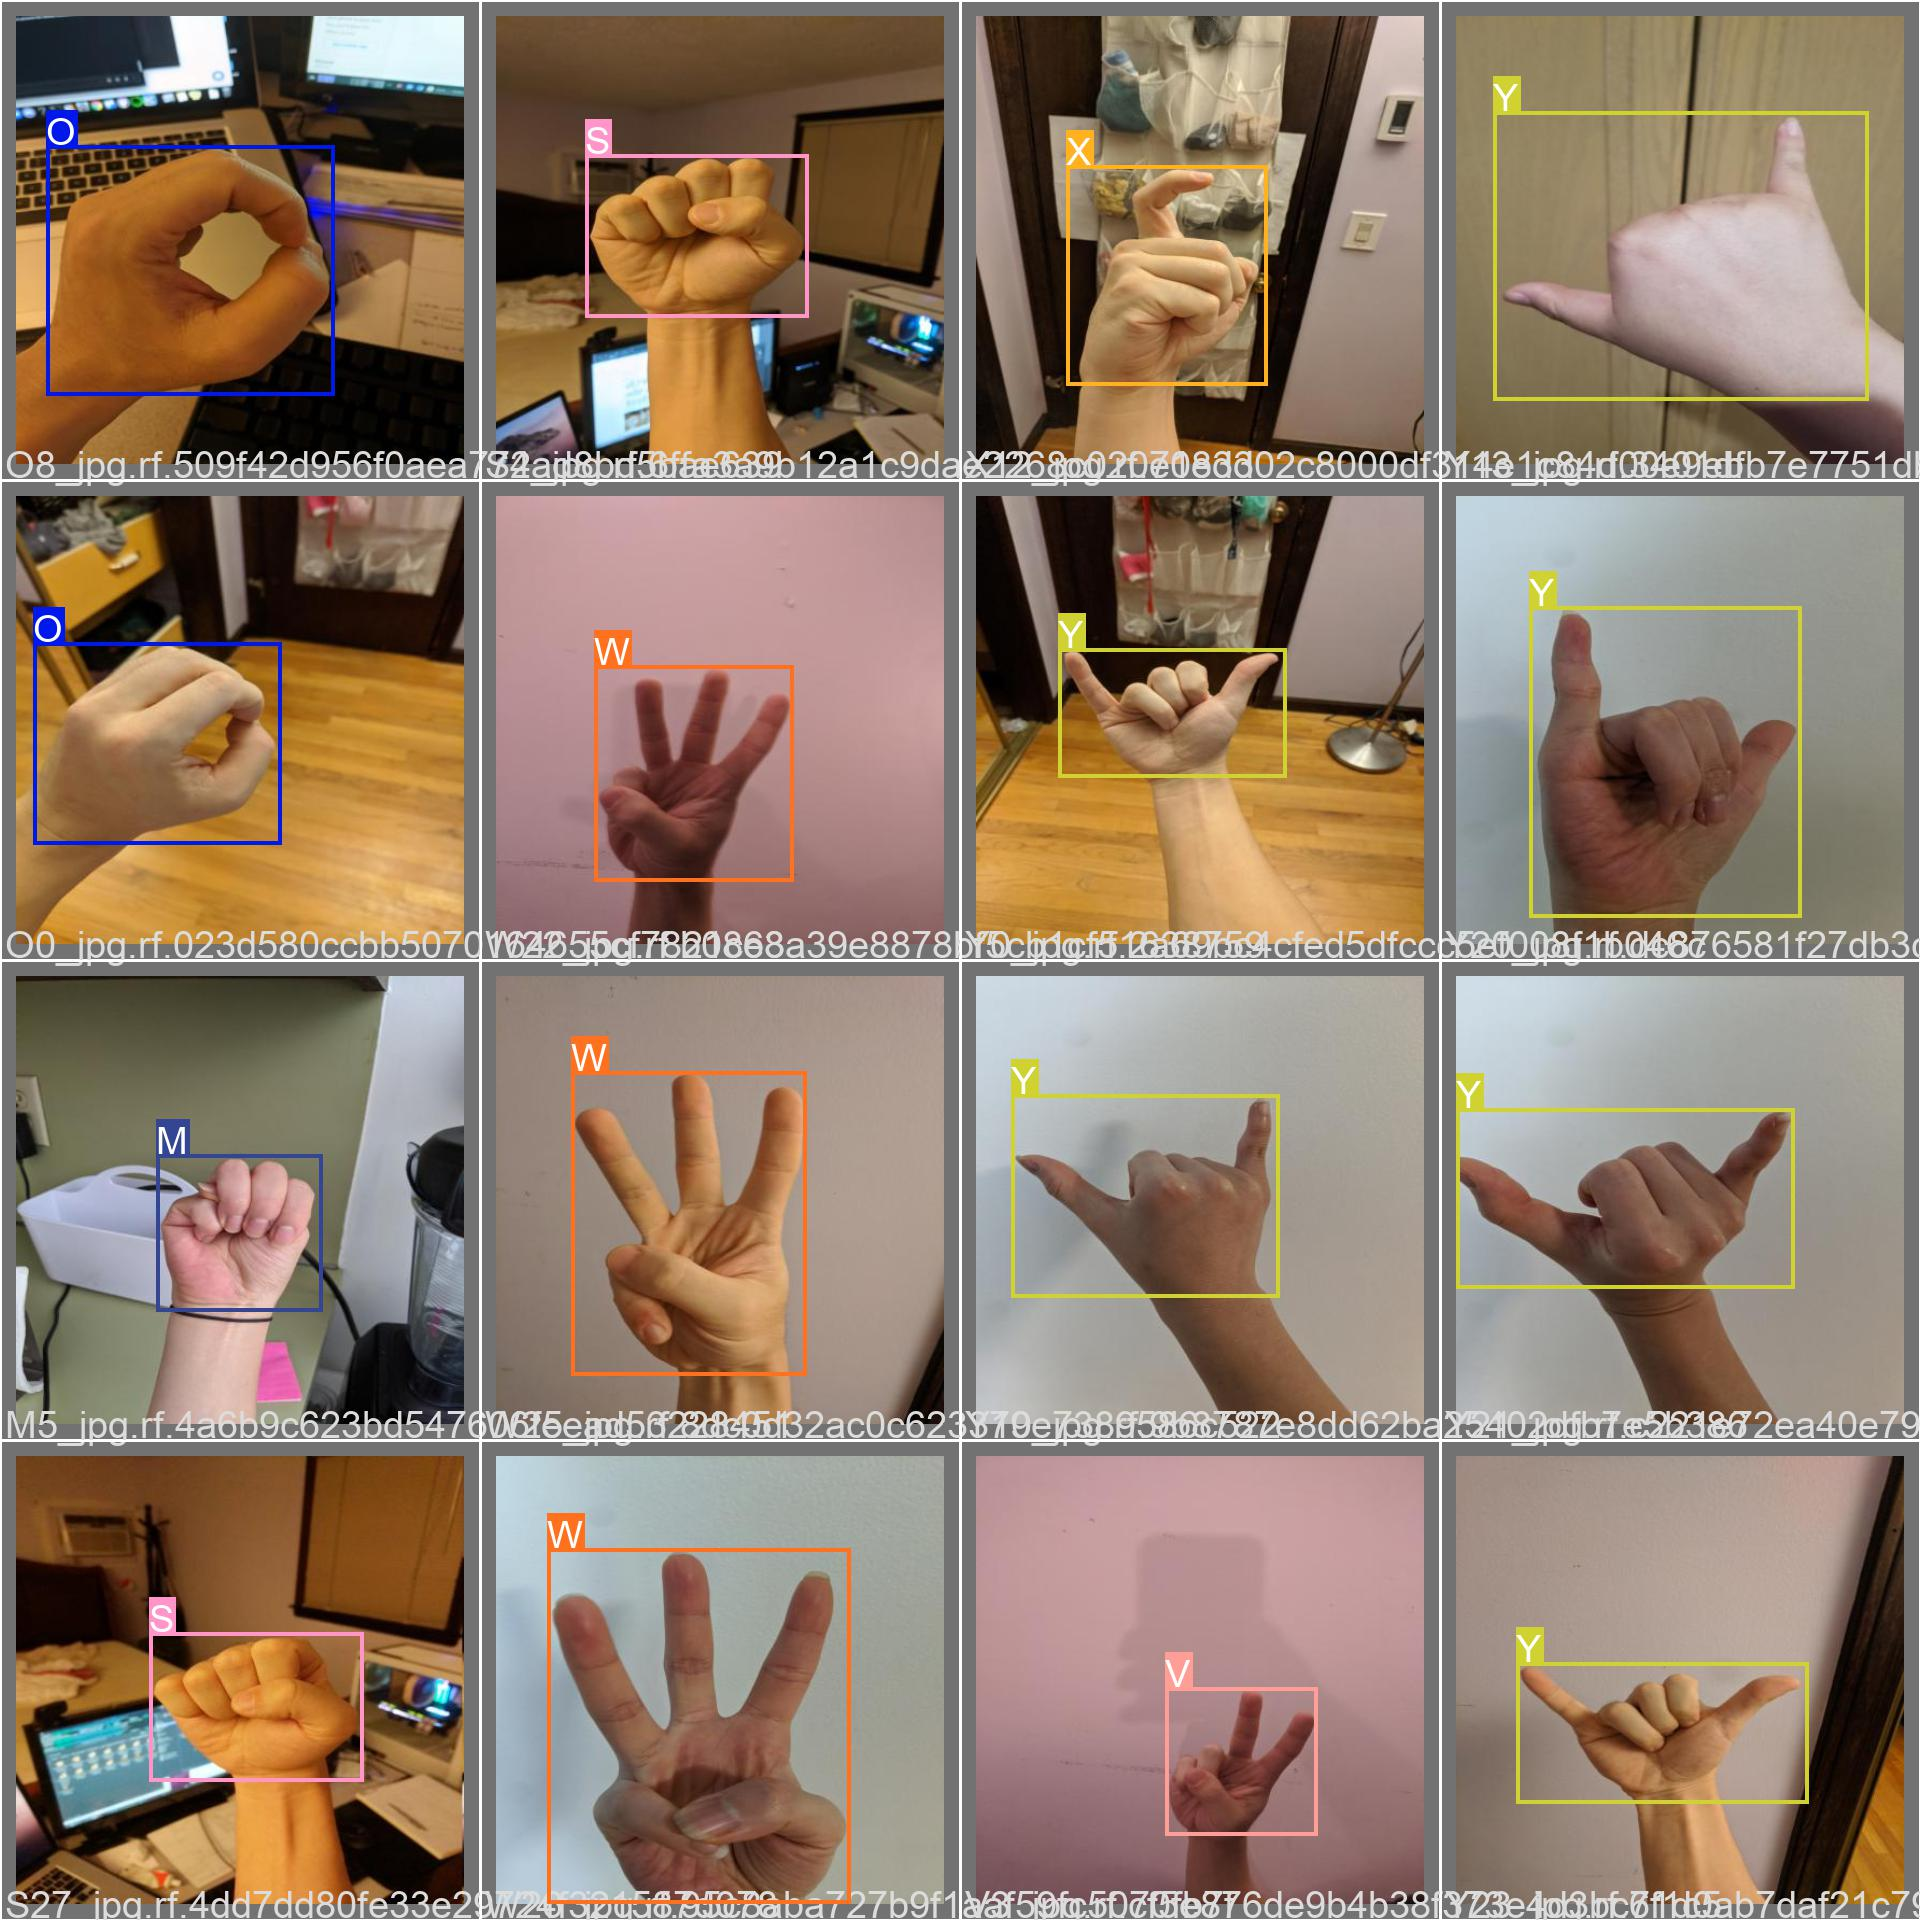

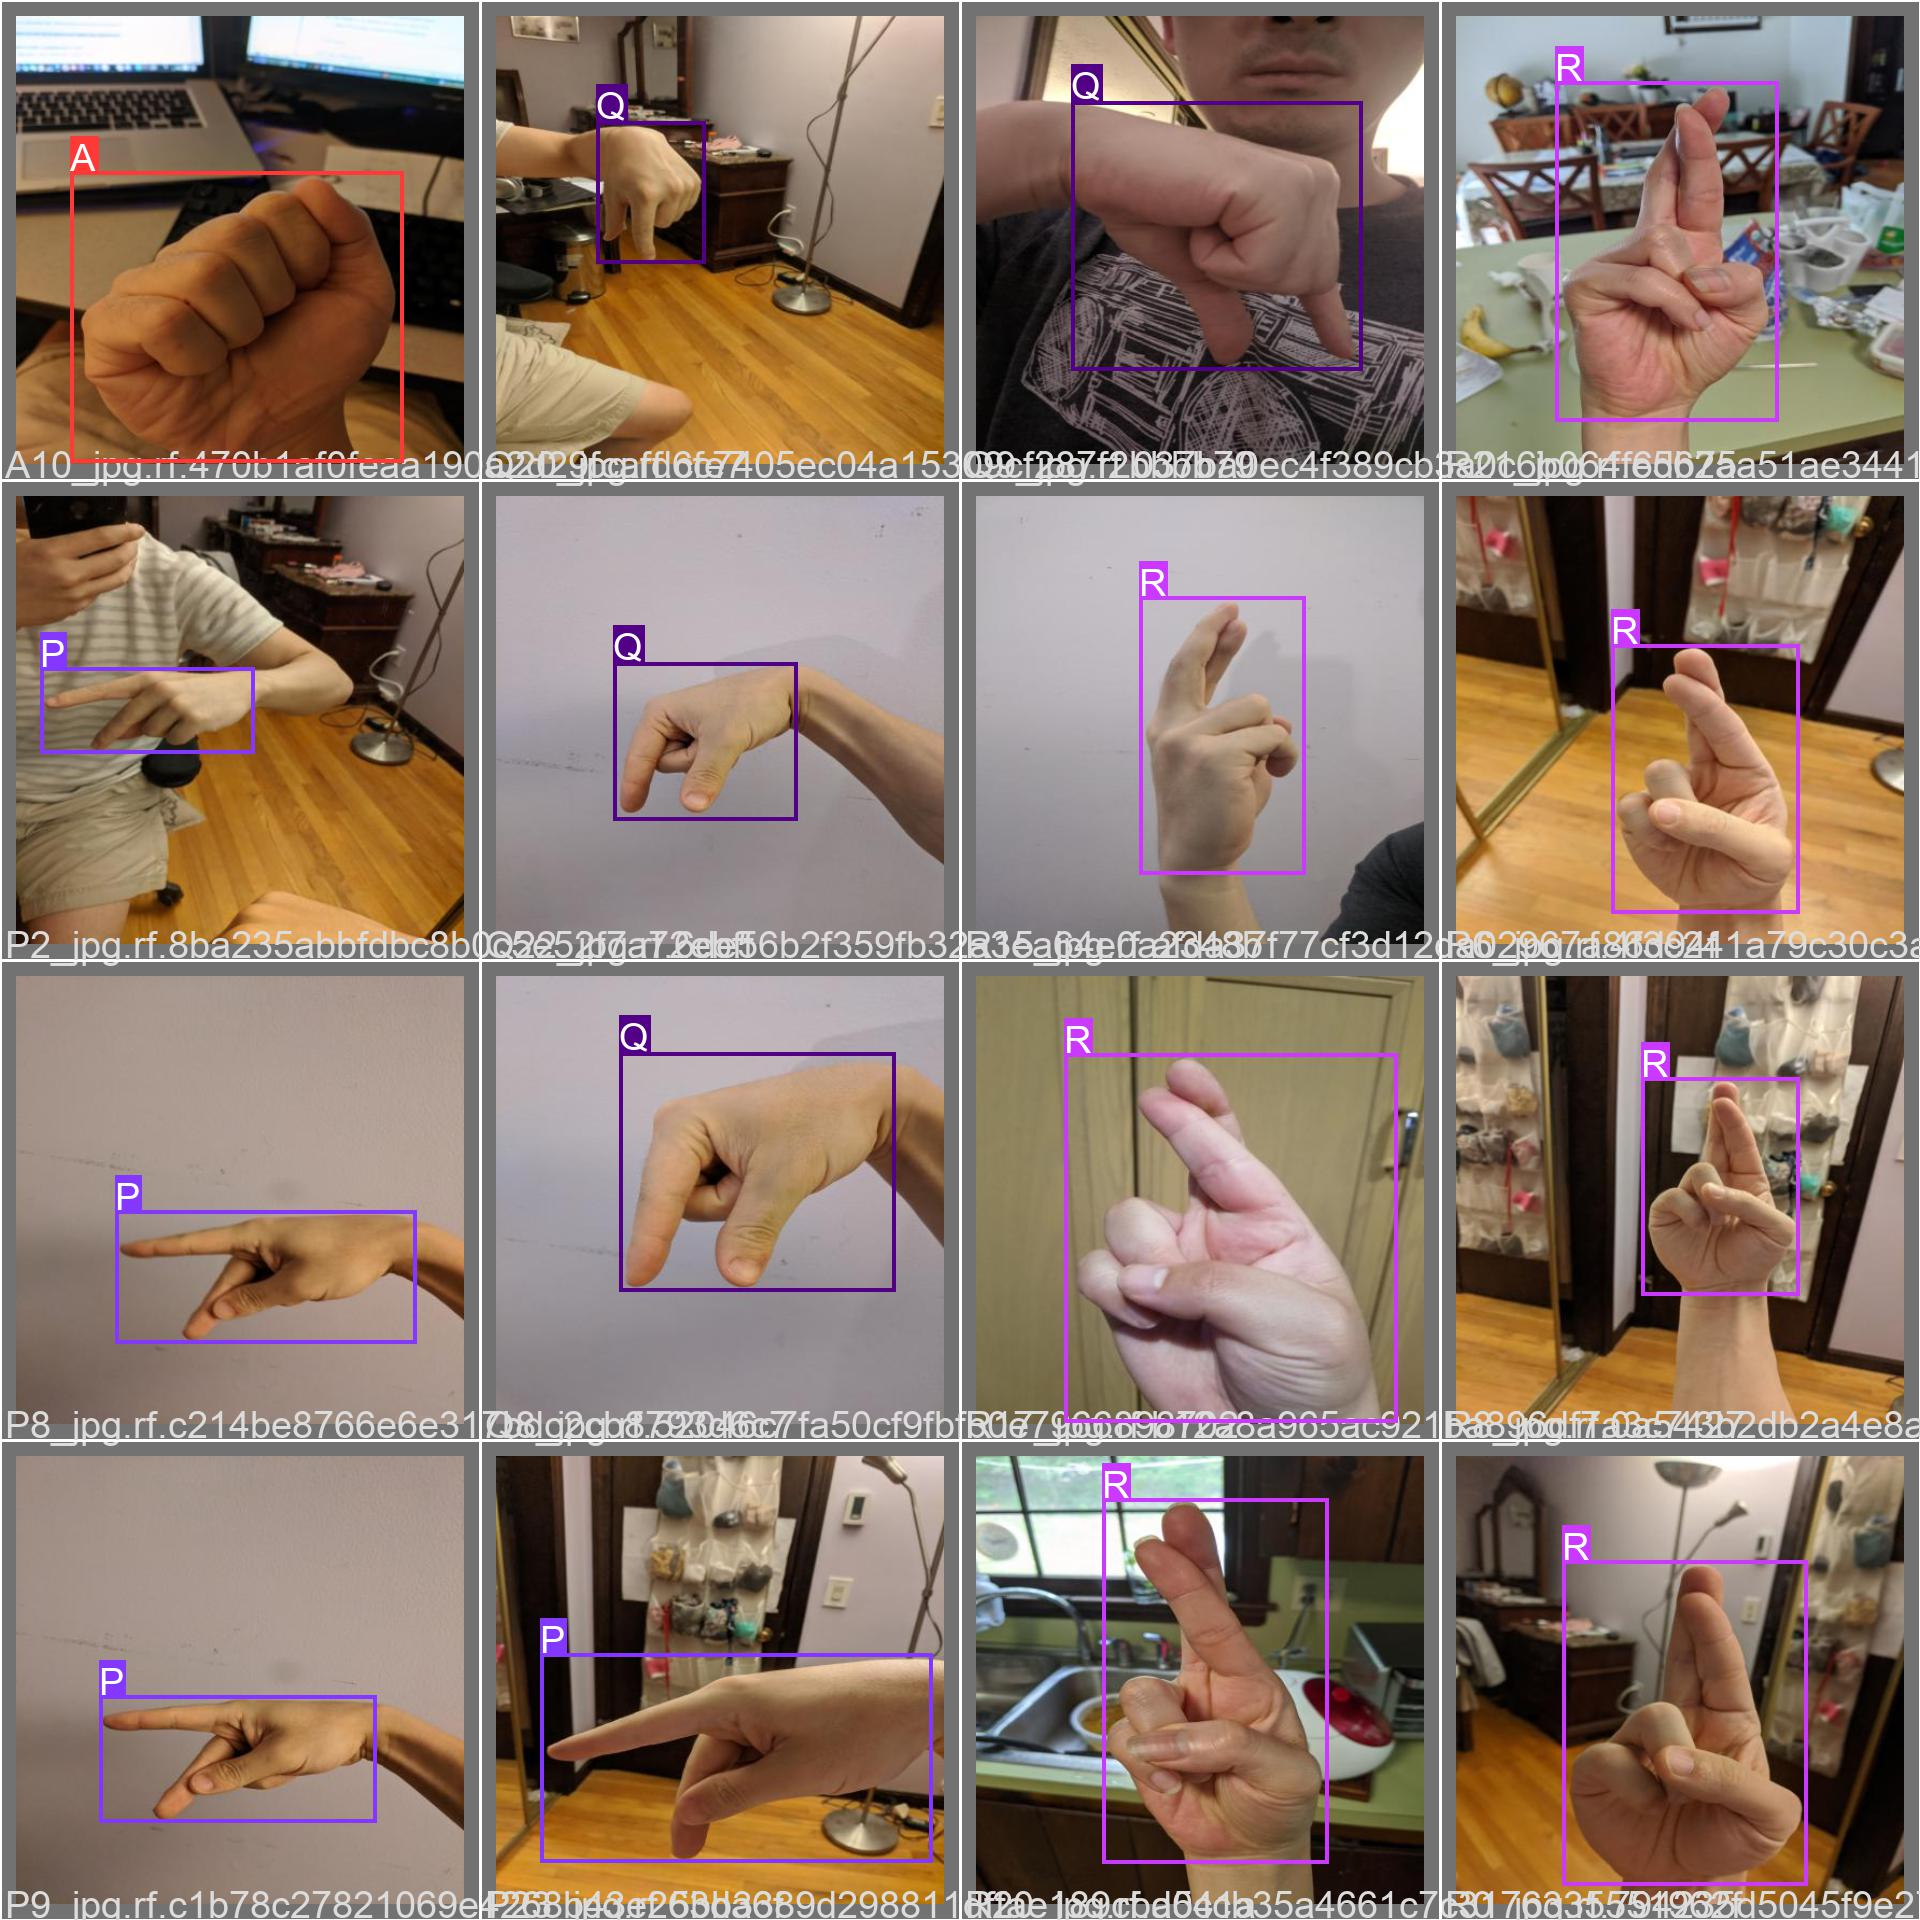

In [ ]:
for imageName in glob.glob('/content/yolov5/runs/val/exp/*.jpg'):
    display(Image(filename=imageName, width=1000, height=1000))
    print('\n')

## **4.** Test

In [ ]:
!python /content/yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 448 --conf 0.5 --source /content/test/images --line-thickness 3

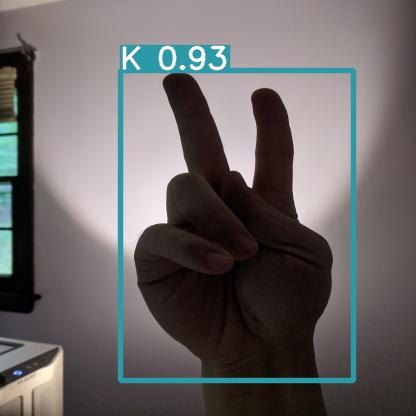

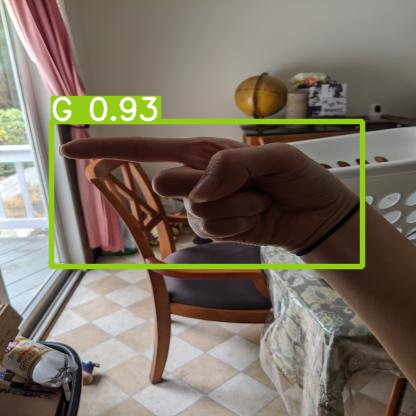

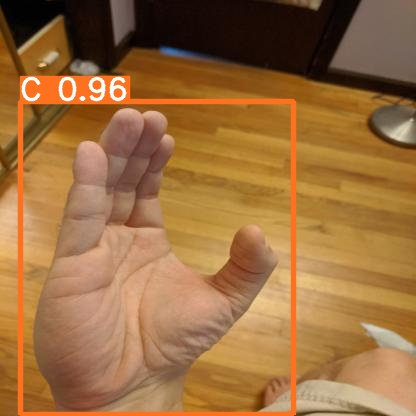

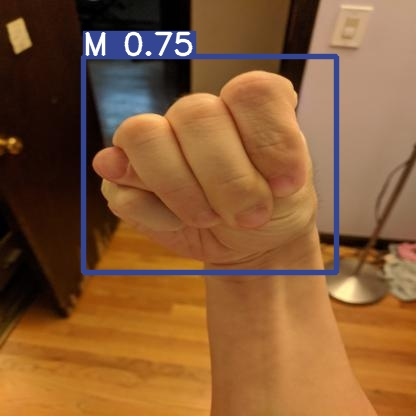

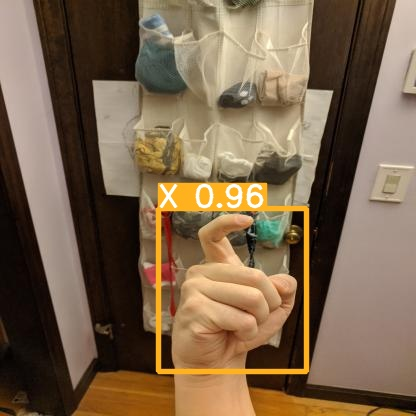

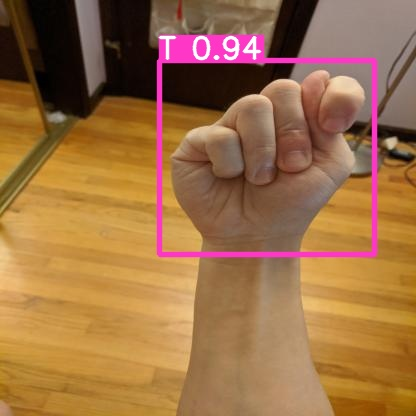

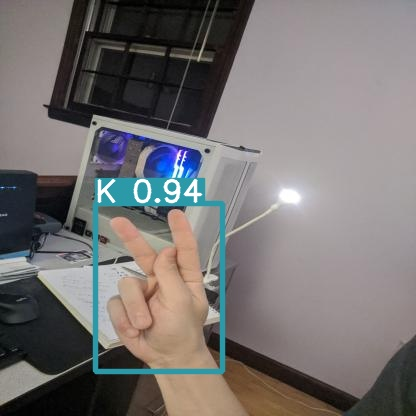

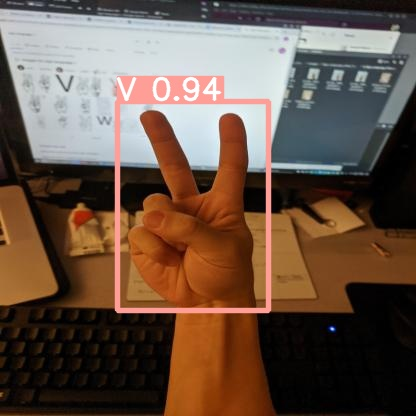

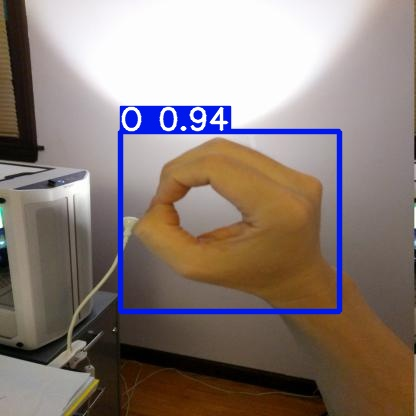

In [ ]:
count = 0
max_display = 10

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    count += 1
    if count == max_display:
        break;

    display(Image(filename=imageName, width=300, height=300))
    print("\n")

## **5.** Export

In [ ]:
# Zip the YOLOv5 folder in order to download it
!zip -r yolov5.zip yolov5/

# and download manually:
#   * 'README.robotflow.txt'
#   * 'data.yaml'
#   * 'yolov5.zip'
#   * 'yolov5s.pt'
#   * this notebook